In [1]:
# import libraries & packages

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader

In [2]:
# define concentration array

concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])

In [3]:
# load data files

# UV plate experiment (4ti-0234)

filenames_4ti0234 = ['infinite_results/4ti0234/p38_Bos_20160125_153819.xml',
                    'infinite_results/4ti0234/p38_BosI_20160125_160254.xml',
                    'infinite_results/4ti0234/p38_Erl_20160125_163232.xml']

# Vision plate experiment (4ti-0223)

filenames_4ti0223 = ['infinite_results/4ti0223/p38_4ti-0223_Bos_20190613_134957.xml',
                     'infinite_results/4ti0223/p38_4ti-0223_Bos_Iso_20190613_142722.xml',
                    'infinite_results/4ti0223/p38_4ti-0223_Erl_20190613_150933.xml']

In [7]:
# read data files

# UV plate experiment

reads_4ti0234 = list()
nreads_4ti0234 = len(filenames_4ti0234)
for read in range(nreads_4ti0234):
    read = platereader.read_icontrol_xml(filenames_4ti0234[read])
    reads_4ti0234.append(read) 
    
# Vision plate experiment

reads_4ti0223 = list()
nreads_4ti0223 = len(filenames_4ti0223)
for read in range(nreads_4ti0223):
    read = platereader.read_icontrol_xml(filenames_4ti0223[read])
    reads_4ti0223.append(read)  

In [15]:
# create function to extract data

def extract_data(row, reads, i, section):
    row_array = np.zeros(12)
    ncol = 12
    for well in range(ncol):
        index = well + 1
        well_name = '%s%s' % (row, index)
        row_array[well] = reads[i][section][well_name]['480']
        
    return(row_array)

In [16]:
# extract data

# UV plate experiment

Bos_prot_4ti0234 = extract_data(row='A', reads=reads_4ti0234, i=0, section='em280')
Bos_buff_4ti0234 = extract_data(row='B', reads=reads_4ti0234, i=0, section='em280')

Bos_iso_prot_4ti0234 = extract_data(row='C', reads=reads_4ti0234, i=1, section='em280')
Bos_iso_buff_4ti0234 = extract_data(row='D', reads=reads_4ti0234, i=1, section='em280')

Erl_prot_4ti0234 = extract_data(row='E', reads=reads_4ti0234, i=2, section='em280')
Erl_buff_4ti0234 = extract_data(row='F', reads=reads_4ti0234, i=2, section='em280')

# Vision plate experiment

Bos_prot_4ti0223 = extract_data(row='C', reads=reads_4ti0223, i=0, section='ex280_scan_top_gain100')
Bos_buff_4ti0223 = extract_data(row='D', reads=reads_4ti0223, i=0, section='ex280_scan_top_gain100')

Bos_iso_prot_4ti0223 = extract_data(row='E', reads=reads_4ti0223, i=1, section='ex280_scan_top_gain100')
Bos_iso_buff_4ti0223 = extract_data(row='F', reads=reads_4ti0223, i=1, section='ex280_scan_top_gain100')

Erl_prot_4ti0223 = extract_data(row='G', reads=reads_4ti0223, i=2, section='ex280_scan_top_gain100')
Erl_buff_4ti0223 = extract_data(row='H', reads=reads_4ti0223, i=2, section='ex280_scan_top_gain100')

In [37]:
# create function to plot data

def plot(prot, buff, i, lig, plate):
    current_palette = sns.color_palette('GnBu_d', 4)
    
    plt.semilogx(concentrations, prot, c=current_palette[i], marker='.', linewidth=2, markersize=6)
    plt.semilogx(concentrations, buff, c=current_palette[i], linestyle='--', linewidth=2, markersize=6)
    
    ax1.yaxis.set_tick_params(labelsize=8)
    ax1.xaxis.set_tick_params(labelsize=8)
    plt.minorticks_off()
    ax1.set_ylim(10**2, 40000)
    
    plt.legend(['p38 + ligand', 'ligand'], loc=2, prop={'size': 8})
    plt.title('%s, %s' %(lig, plate), fontsize=10)
    
    sns.set_style(style='white')
    sns.despine()

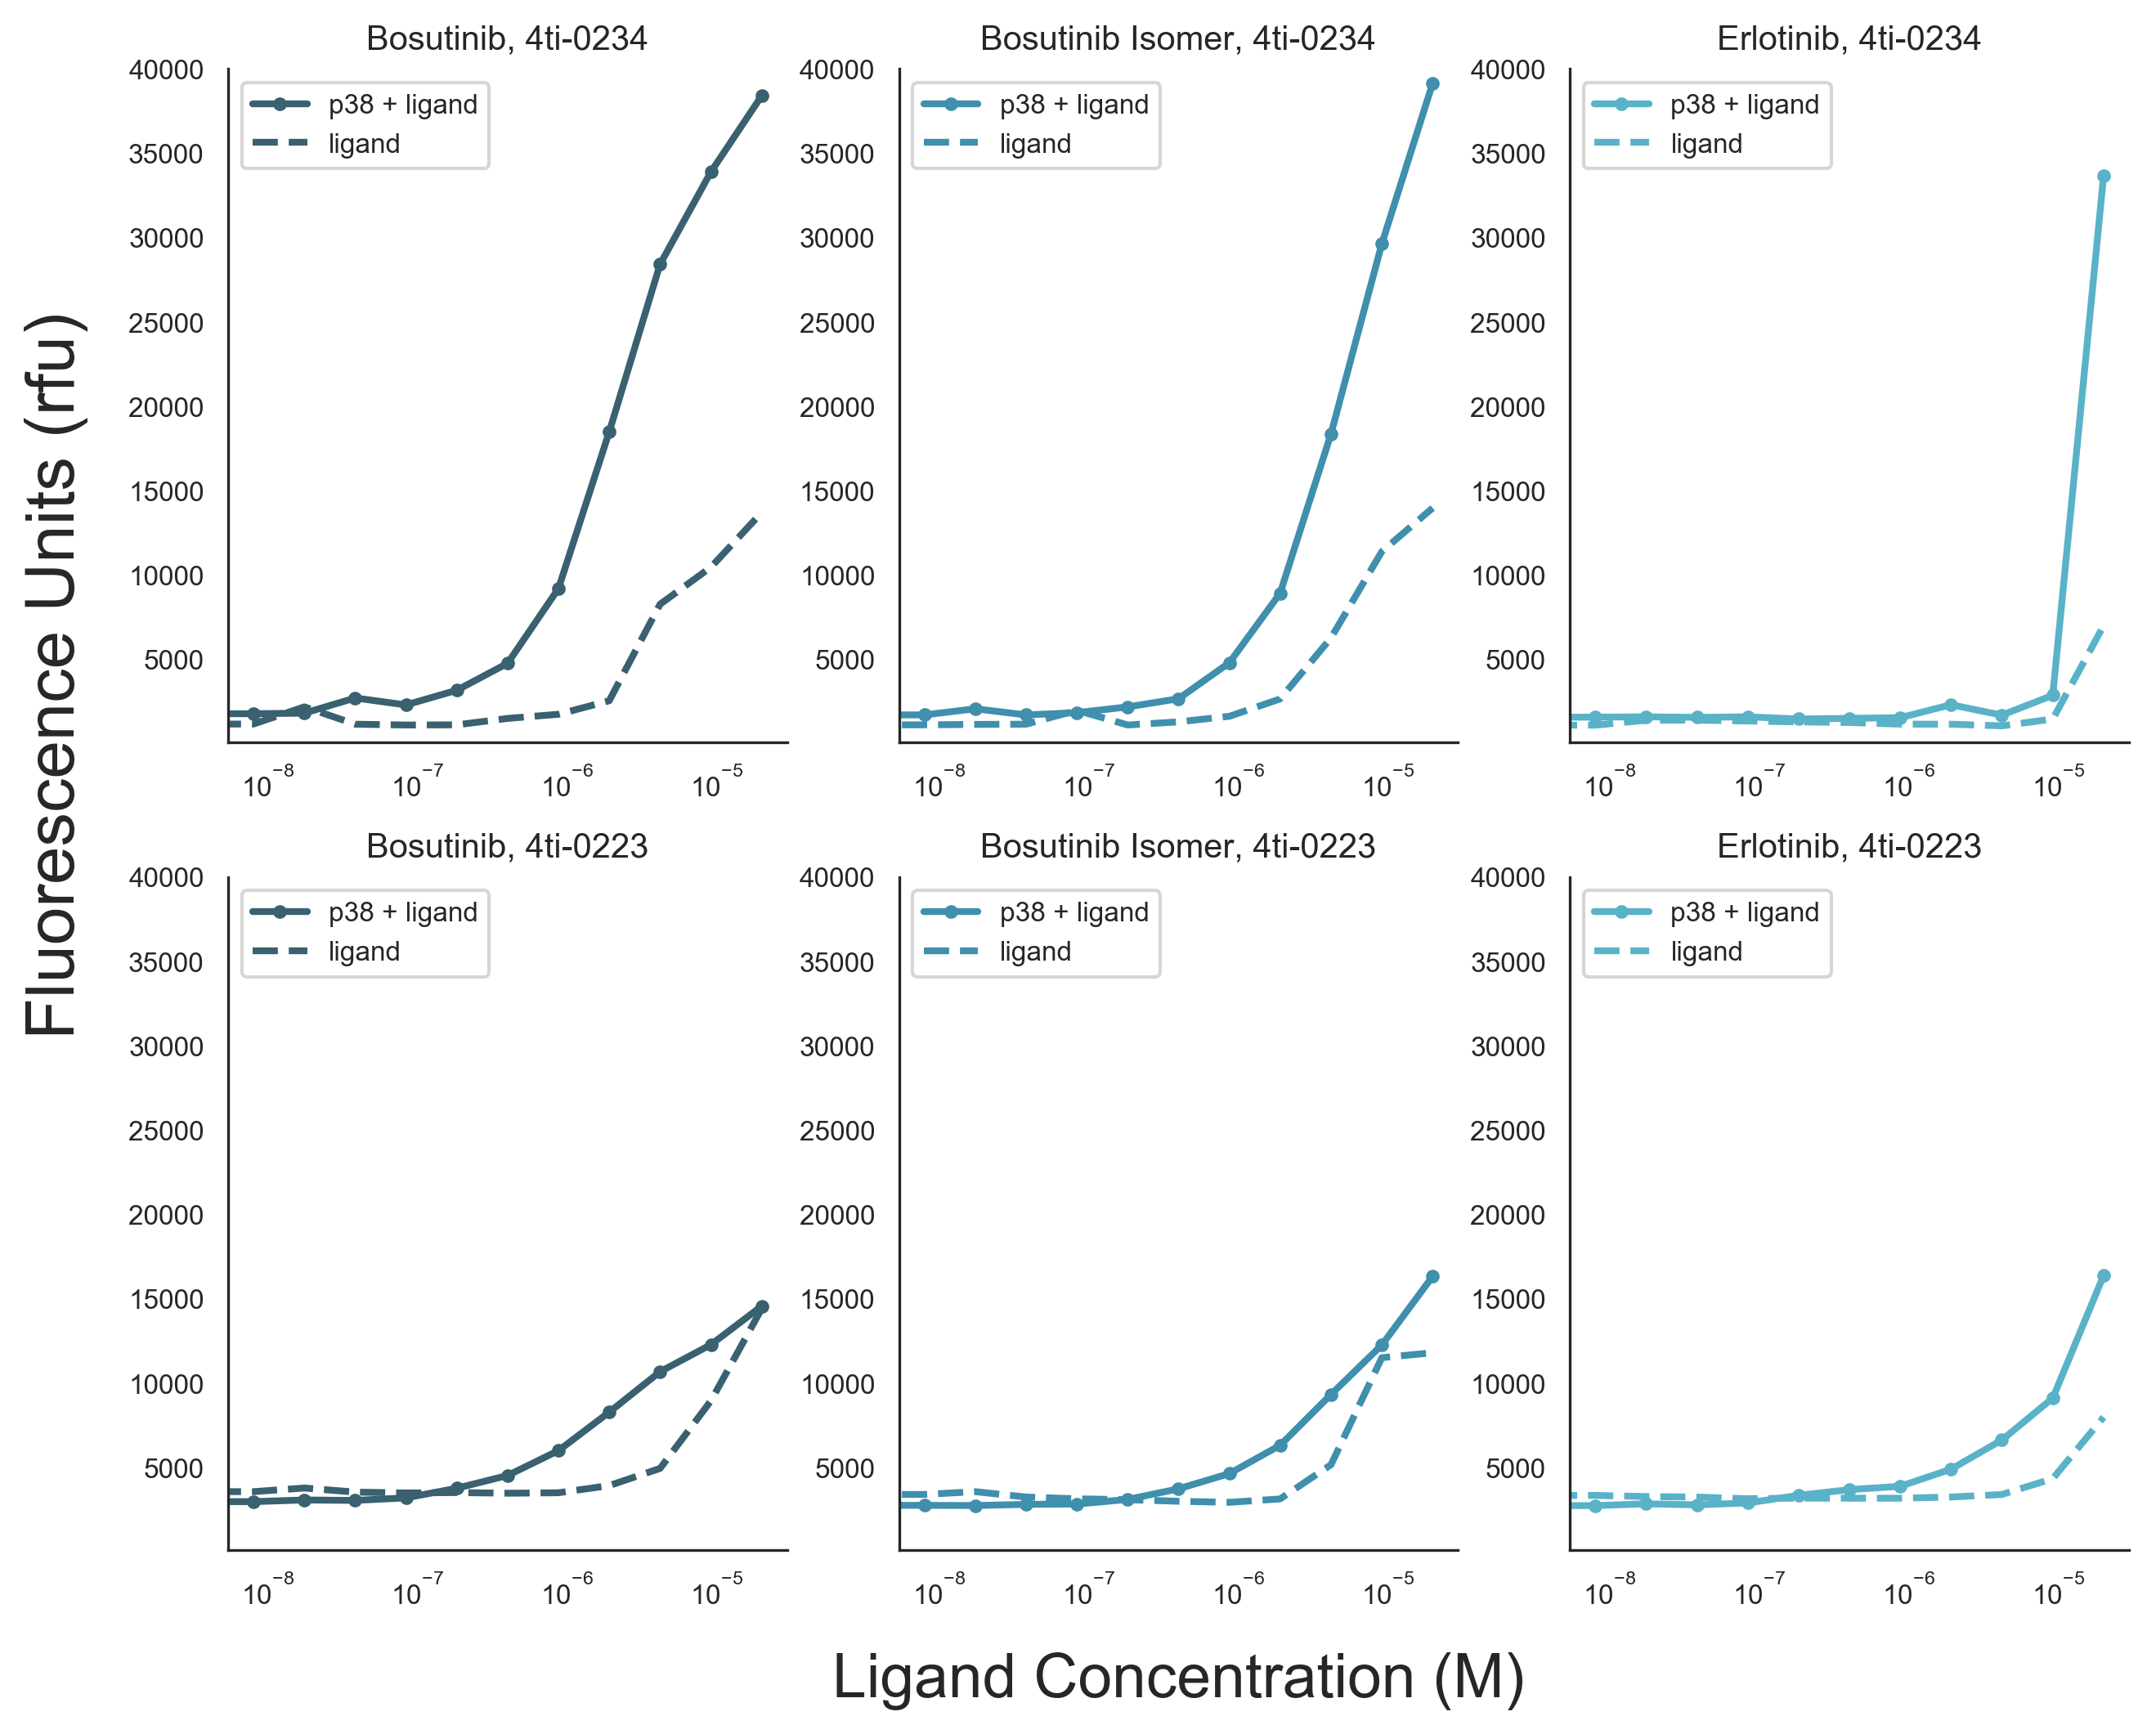

In [38]:
# plot data

fig = plt.figure(figsize=(10,8), dpi=300)
# fig.subplots_adjust(hspace=0.3)

# UV plate plots

ax1 = fig.add_subplot(2,3,1)
Bos_4ti0234 = plot(prot=np.flip(Bos_prot_4ti0234, axis=0), buff=np.flip(Bos_buff_4ti0234, axis=0), lig='Bosutinib', i=0, plate='4ti-0234')

ax1 = fig.add_subplot(2,3,2)
Bos_iso_4ti0234 = plot(prot=np.flip(Bos_iso_prot_4ti0234, axis=0), buff=np.flip(Bos_iso_buff_4ti0234, axis=0), lig='Bosutinib Isomer', i=1, plate='4ti-0234')

ax1 = fig.add_subplot(2,3,3)
Erl_4ti0234 = plot(prot=np.flip(Erl_prot_4ti0234, axis=0), buff=np.flip(Erl_buff_4ti0234, axis=0), lig='Erlotinib', i=2, plate='4ti-0234')

# Vision plate plots

ax1 = fig.add_subplot(2,3,4)
Bos_4ti0223 = plot(prot=np.flip(Bos_prot_4ti0223, axis=0), buff=np.flip(Bos_buff_4ti0223, axis=0), lig='Bosutinib', i=0, plate='4ti-0223')

ax1 = fig.add_subplot(2,3,5)
Bos_iso_4ti0223 = plot(prot=np.flip(Bos_iso_prot_4ti0223, axis=0), buff=np.flip(Bos_iso_buff_4ti0223, axis=0), lig='Bosutinib Isomer', i=1, plate='4ti-0223')

ax1 = fig.add_subplot(2,3,6)
Erl_4ti0223 = plot(prot=np.flip(Erl_prot_4ti0223, axis=0), buff=np.flip(Erl_buff_4ti0223, axis=0), lig='Erlotinib', i=2, plate='4ti-0223')

axis = plt.gca()
plt.ylabel('Fluorescence Units (rfu)', fontsize=20)
axis.yaxis.set_label_coords(-2.65,1.3)
plt.xlabel('Ligand Concentration (M)', fontsize=18)
axis.xaxis.set_label_coords(-0.7,-0.15)

fig.savefig('20190613_background_fluo_p38_kD.pdf', dpi=300, bbox='tight')